<p style="text-align: center; font-weight: bold; font-size:xxx-large; color:green; background-color:#D3EAB9;">Coffee</p>

<img src="Images/coffee_image1.PNG" />

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">Do you ever wonder the significance of all those regions and types printed on bags of coffee?</p>

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">Do any of them truly indicate superior coffee?</p>  

In [119]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_theme(style='darkgrid')
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [96]:
df = pd.read_csv("coffee_region_variety_totals")

In [163]:
df['Outstanding'] = df['Total_Cup_Points'].astype('int64') # a new column created that will indicate if "Outstanding" or not
df.loc[df["Outstanding"]<85, ["Outstanding"]]=0 # A "0" indicates not "Outstanding"
df.loc[df["Outstanding"]>=85, ["Outstanding"]]=1 # A "1" indicates "Outstanding"

In [165]:
df.tail(10)

,Country_of_Origin,Region,Variety,Total_Cup_Points,Outstanding
1300,Mexico,"sierra norte yajalon, chiapas",Typica,70.75,0
1301,Brazil,cerrado,unknown_variety,70.67,0
1302,Honduras,marcala,Catuai,69.33,0
1303,Honduras,marcala,Catuai,69.17,0
1304,Honduras,marcala,Catuai,69.17,0
1305,Mexico,juchique de ferrer,Bourbon,68.33,0
1306,Haiti,"department d'artibonite , haiti",Typica,67.92,0
1307,Nicaragua,jalapa,Caturra,63.08,0
1308,Guatemala,nuevo oriente,Catuai,59.83,0
1309,Honduras,comayagua,Caturra,0.00,0


In [166]:
df_shuffled = df.sample(frac=1) #this shuffled data set will be split into test and training data
df_train = df_shuffled.head(1114); #1114 is 85% of the dataset
df_test = df_shuffled.tail(196);

In [154]:
aspects = ["aroma", "flavor", "aftertaste", "acidity", "body", "balance", "uniformity", "clean_cup", "sweetness"]

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">The Coffee Quality Institue (https://www.coffeeinstitute.org/) measures these attributes to calculate a total quality score.</p>

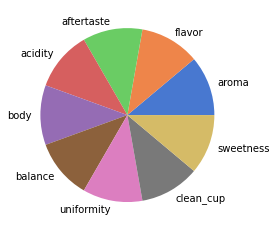

In [188]:
g = [1, 1, 1, 1, 1, 1, 1, 1, 1]
colors = sns.color_palette('muted')[0:9]
fig, ax = plt.subplots()
ax.pie(g, labels = aspects, colors=colors);

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">Here are the countries represented in the database:</p>

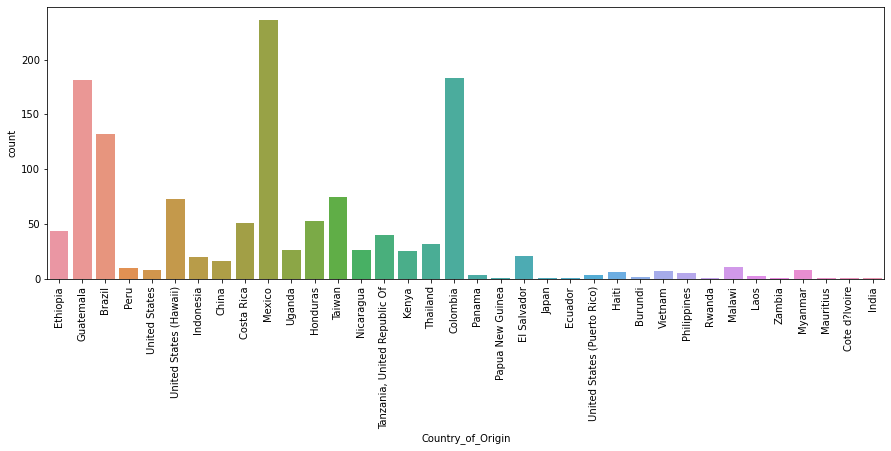

In [180]:
plt.figure(figsize=[15, 5])
plt.subplot(111)
sns.countplot(x='Country_of_Origin', data=df)
plt.xticks(rotation=90);
#fig, ax = plt.subplots()
#fig.set_size_inches(15, 5)
#df.Country_of_Origin.value_counts().plot(kind="bar", color = '#5D4037', title = 'Countries Where Coffee is Grown', 
#                                         ylabel = '# of coffees in database');

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">The 40 most represented regions within those countries:</p>

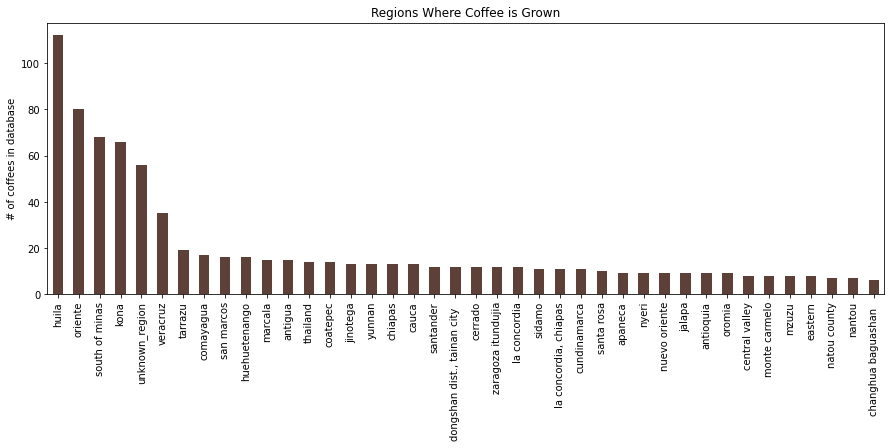

In [168]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
df.Region.value_counts().head(40).plot(kind="bar", color = '#5D4037', title = 'Regions Where Coffee is Grown', 
                                       ylabel = '# of coffees in database');

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">And these are the varieties grown:</p>

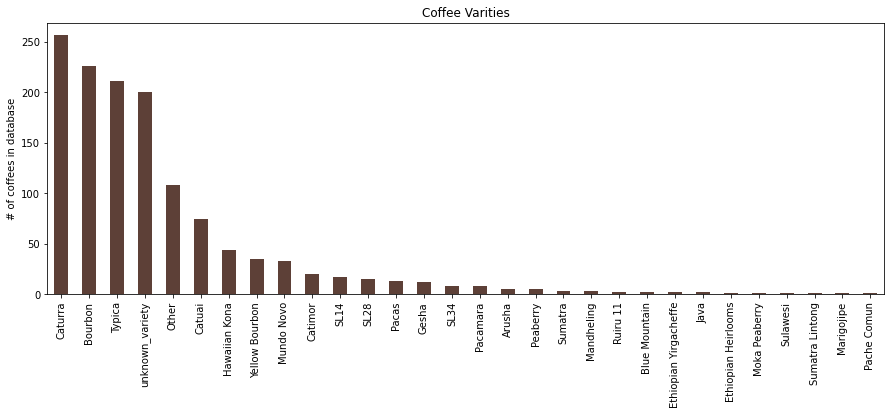

In [169]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
df.Variety.value_counts().head(40).plot(kind="bar", color = '#5D4037', title = 'Coffee Varities', 
                                        ylabel = '# of coffees in database');

<p style="text-align: center; font-weight: bold; font-size:x-large; color:green; background-color:#D3EAB9;">A coffee is considered "outstanding" if it scores a total of 85 or higher. This is roughly 10% of coffes tested, like getting an "A" grade in quality.</p>

In [170]:
df[df['Total_Cup_Points'] >= 85]

,Country_of_Origin,Region,Variety,Total_Cup_Points,Outstanding
0,Ethiopia,guji-hambela,unknown_variety,90.58,1
1,Ethiopia,guji-hambela,Other,89.92,1
2,Guatemala,unknown_region,Bourbon,89.75,1
3,Ethiopia,oromia,unknown_variety,89.00,1
4,Ethiopia,guji-hambela,Other,88.83,1
...,...,...,...,...,...
101,Kenya,central kenya,SL34,85.00,1
102,Brazil,grama valley,Mundo Novo,85.00,1
103,Mexico,mexico,Pacamara,85.00,1
104,United States (Hawaii),kona,unknown_variety,85.00,1


In [171]:
df_shuffled.head(15)

,Country_of_Origin,Region,Variety,Total_Cup_Points,Outstanding
32,Brazil,vale da grama,Bourbon,86.42,1
841,Mexico,chiapas,Catuai,81.83,0
325,Colombia,huila,Caturra,83.67,0
1158,El Salvador,cacahuatique,Bourbon,79.67,0
644,Mexico,veracruz,unknown_variety,82.58,0
72,United States (Hawaii),kona,Hawaiian Kona,85.42,1
1263,Guatemala,oriente,Bourbon,76.33,0
110,Colombia,huila,Caturra,84.92,0
385,"Tanzania, United Republic Of",karatu northern,Bourbon,83.42,0
220,Ethiopia,snnprg; kafa; telo woreda; shada kebele,Gesha,84.17,0
